---
title: Dimensionality Reduction
format:
  html:
    css: h1
    embed-resources: true
    code-fold: true
---

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# read the data
df=pd.read_csv('../../data/Clean_Data_project_Pub.Transport_5000/EPA_SmartLocationDatabase_V3_Jan_2021_Clean.csv',)

# normalize every column of the dataframe df
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [20]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_scaled)

PCA()

In [21]:
pca.explained_variance_ratio_

array([1.50108382e-01, 1.15609443e-01, 7.82879871e-02, 6.17889215e-02,
       5.63492419e-02, 4.19796970e-02, 3.79998848e-02, 3.40466529e-02,
       3.01126629e-02, 2.86904491e-02, 2.67076414e-02, 2.40012178e-02,
       2.24608260e-02, 2.20378564e-02, 1.98976844e-02, 1.91382357e-02,
       1.78008382e-02, 1.63100277e-02, 1.61154128e-02, 1.47804334e-02,
       1.42514899e-02, 1.31911235e-02, 1.24278167e-02, 1.11199160e-02,
       1.05395067e-02, 1.02387927e-02, 9.43188704e-03, 8.64975599e-03,
       7.52941658e-03, 6.92614696e-03, 6.65040542e-03, 6.46543543e-03,
       6.38477581e-03, 5.71041588e-03, 4.07517833e-03, 3.90315234e-03,
       3.76328725e-03, 3.64003766e-03, 3.56666943e-03, 3.19575731e-03,
       3.04708274e-03, 2.61840439e-03, 2.13646048e-03, 1.53852297e-03,
       1.22802965e-03, 9.91551753e-04, 8.72316358e-04, 6.53308714e-04,
       5.32654575e-04, 3.81616309e-04, 8.87763636e-05, 2.12411862e-05,
       5.57174879e-06, 1.25833539e-13, 1.51285044e-21, 6.27480366e-22,
      

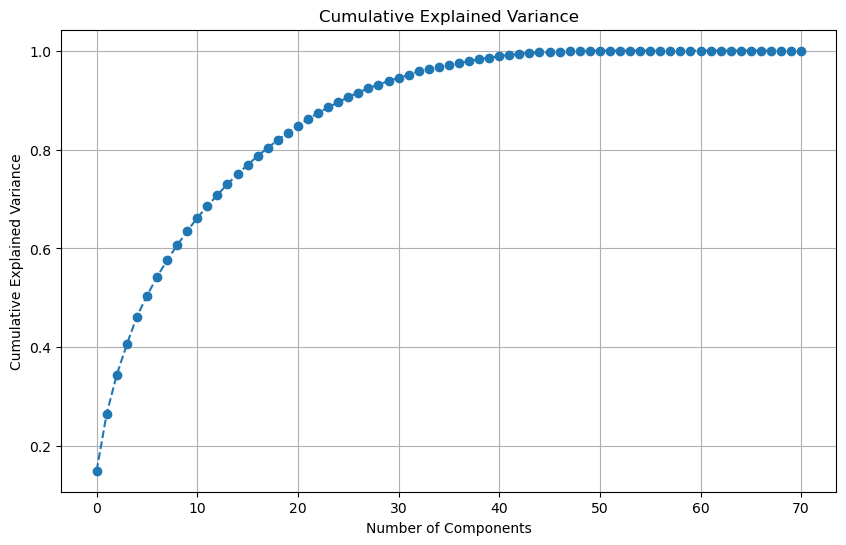

In [22]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [23]:
# find what point pca.explained_variance_ratio_.cumsum()) is greater than 0.8
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0]

25

By rule of thumb, we want to keep at least 80% of the variance. However, to be more percise, we are going to choose 25 components such that the explained variance is greater than 0.9.

In [24]:
pca=PCA(n_components=17)
pca.fit(df_scaled)

PCA(n_components=17)

In [27]:
pca.transform(df_scaled)
scores_pca = pca.transform(df_scaled)

scores_pca_df = pd.DataFrame(scores_pca, columns=[f'PC{i}' for i in range(1, scores_pca.shape[1] + 1)])
scores_pca_df.to_csv('../../data/Clean_Data_project_Pub.Transport_5000/scores_pca.csv', index=False)